# NOT NECESSARY TO RUN THIS PART

## This part is the exploration of Milan's Data 

Importing DataFrame with old chinese stocks information

In [2]:
InitialDataFrame = pd.read_csv('./stock_data.csv/stock_data.csv')

Understanding that big dataframe (The important thing are the Tickers)

In [3]:
InitialDataFrame.columns

Index(['date', 'ticker', 'open', 'high', 'low', 'close', 'volume',
       'outstanding_share', 'turnover', 'pe', 'pe_ttm', 'pb', 'ps', 'ps_ttm',
       'dv_ratio', 'dv_ttm', 'total_mv', 'qfq_factor'],
      dtype='object')

In [4]:
InitialDataFrame.dtypes

date                  object
ticker                object
open                 float64
high                 float64
low                  float64
close                float64
volume               float64
outstanding_share    float64
turnover             float64
pe                   float64
pe_ttm               float64
pb                   float64
ps                   float64
ps_ttm               float64
dv_ratio             float64
dv_ttm               float64
total_mv             float64
qfq_factor           float64
dtype: object

In [5]:
InitialDataFrame['date'] = InitialDataFrame['date'].astype('datetime64')

In [6]:
InitialDataFrame['month-year']= InitialDataFrame['date'].dt.month.apply(str)+'-'+InitialDataFrame['date'].dt.year.apply(str)

<AxesSubplot:xlabel='date'>

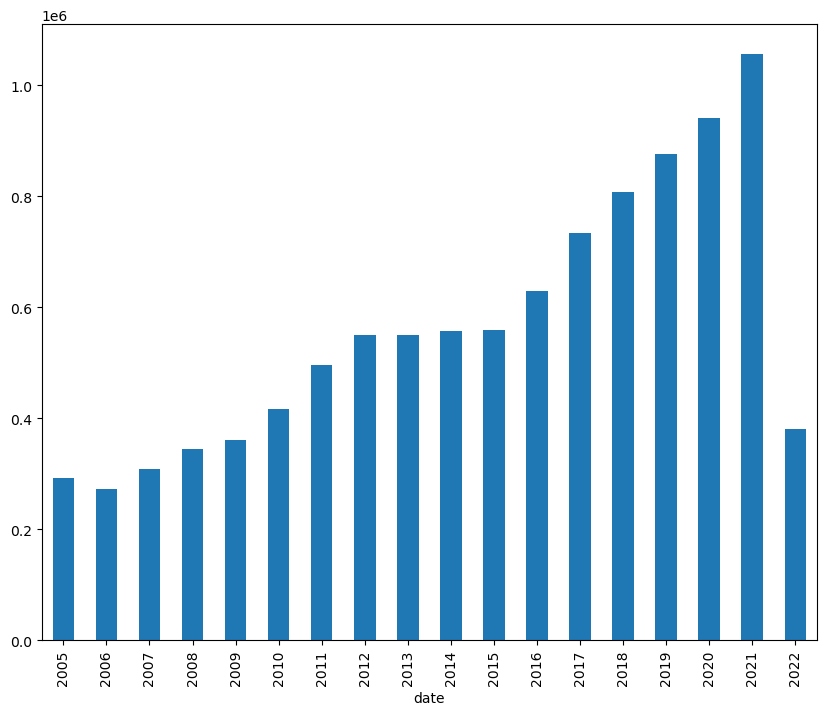

In [7]:
InitialDataFrame.groupby(InitialDataFrame['date'].dt.year).count()['close'].plot(kind='bar',figsize = (10,8))

In [8]:
InitialDataFrame.groupby(InitialDataFrame['date'].dt.year)['ticker'].nunique()

date
2005    1265
2006    1329
2007    1442
2008    1506
2009    1609
2010    1950
2011    2229
2012    2385
2013    2402
2014    2524
2015    2745
2016    2974
2017    3409
2018    3516
2019    3720
2020    4115
2021    4596
2022    4712
Name: ticker, dtype: int64

Getting the List of tickers in 2022

In [9]:
ListOfTickers = InitialDataFrame[InitialDataFrame['date'].dt.year == 2022].groupby('ticker')['ticker'].nunique()

In [10]:
ListOfTickers.to_csv('List_of_tickers.csv')

# Run this cell only once

In [ ]:
!pip install -r requirements.txt

# FROM THIS POINT ONWARDS RUN IT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
ListOfTickers = pd.read_csv('List_of_tickers.csv')

In [11]:
stocks = ListOfTickers.index.values.tolist()
data = yf.download(stocks, start="2023-01-01", end="2024-01-01")['Adj Close']

[******************    37%                       ]  1746 of 4712 completedFailed to get ticker 'SH600681' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)
[******************    37%                       ]  1748 of 4712 completedFailed to get ticker 'SH600370' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)
[*******************   39%                       ]  1833 of 4712 completedFailed to get ticker 'SZ002193' reason: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))
[**********************48%                       ]  2283 of 4712 completedFailed to get ticker 'SZ300015' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)
[**********************49%                       ]  2286 of 4712 completedFailed to get ticker 'SH600353' reason: HTTPSConnectio

In [13]:
data.to_pickle('tsdata.pkl')

In [12]:
# Calculate the returns (percentage change)
returns = data.pct_change().sum()  # Sum of daily returns over the year

# Sort stocks by return in descending order
sorted_returns = returns.sort_values(ascending=False)
print(sorted_returns.to_string())


Ticker
SH600000    0.0
SZ002573    0.0
SZ002589    0.0
SZ002588    0.0
SZ002587    0.0
SZ002586    0.0
SZ002585    0.0
SZ002584    0.0
SZ002583    0.0
SZ002582    0.0
SZ002581    0.0
SZ002580    0.0
SZ002579    0.0
SZ002578    0.0
SZ002577    0.0
SZ002576    0.0
SZ002575    0.0
SZ002590    0.0
SZ002591    0.0
SZ002592    0.0
SZ002601    0.0
SZ002608    0.0
SZ002607    0.0
SZ002606    0.0
SZ002605    0.0
SZ002603    0.0
SZ002602    0.0
SZ002600    0.0
SZ002593    0.0
SZ002599    0.0
SZ002598    0.0
SZ002597    0.0
SZ002596    0.0
SZ002595    0.0
SZ002594    0.0
SZ002574    0.0
SZ002572    0.0
SZ002610    0.0
SZ002571    0.0
SZ002552    0.0
SZ002551    0.0
SZ002550    0.0
SZ002549    0.0
SZ002548    0.0
SZ002547    0.0
SZ002546    0.0
SZ002545    0.0
SZ002544    0.0
SZ002543    0.0
SZ002542    0.0
SZ002541    0.0
SZ002540    0.0
SZ002539    0.0
SZ002538    0.0
SZ002553    0.0
SZ002554    0.0
SZ002555    0.0
SZ002564    0.0
SZ002570    0.0
SZ002569    0.0
SZ002568    0.0
SZ002567    0.0
S